In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [142]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [143]:
plt.style.use('ggplot')

In [144]:
!ls

Average Weighted Recommendation.ipynb
Collaborative Rec Sys Mod4 Project.ipynb
Content Based Movie Recomender.ipynb
Movie Data Visualisations.ipynb
Sigmoid recommender alt data set.ipynb
Surpris Lab mk11 UNBIASED.ipynb
ml-latest-small
tmdb-movie-metadata


In [145]:
df = pd.read_csv('./ml-latest-small/ratings.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [146]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [147]:
df.movieId.nunique()

9724

In [148]:
df.movieId.value_counts()

356       329
318       317
296       307
593       279
2571      278
         ... 
5986        1
100304      1
34800       1
83976       1
8196        1
Name: movieId, Length: 9724, dtype: int64

In [151]:
df2 = df
df2['count']=1
df2 = df.groupby(['movieId'])['count'].count().reset_index()

In [152]:
df2.head(316) #Ok we can see as a check against movieId-356 with 329 ratings, that the count has worked 

,movieId,count
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49
...,...,...
311,353,64
312,354,6
313,355,42
314,356,329


## The 'Long Tail' Visualised

The aim for this visualisation is to reproduce the long tail graph showing the high popularity of a relatively small number of titles compared with the low popularity associated with the majority of titles. 

In [76]:
df1 = df2.sort_values(by=['count'], ascending=False)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



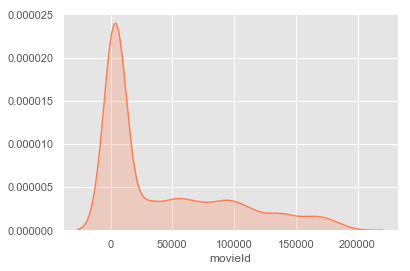

In [77]:
sns.distplot(df1['movieId'], kde_kws={'shade':True}, hist=False, color='coral');

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



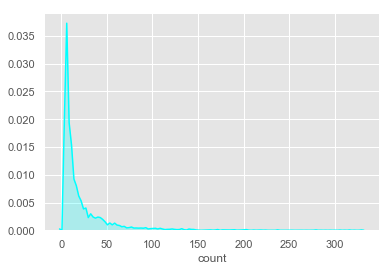

In [78]:
sns.distplot(df1['count'], kde_kws={'shade':True}, hist=False, color='#00ffff')

Text(0.5, 1.0, 'Graph to shown distribution of ratings across all movies')

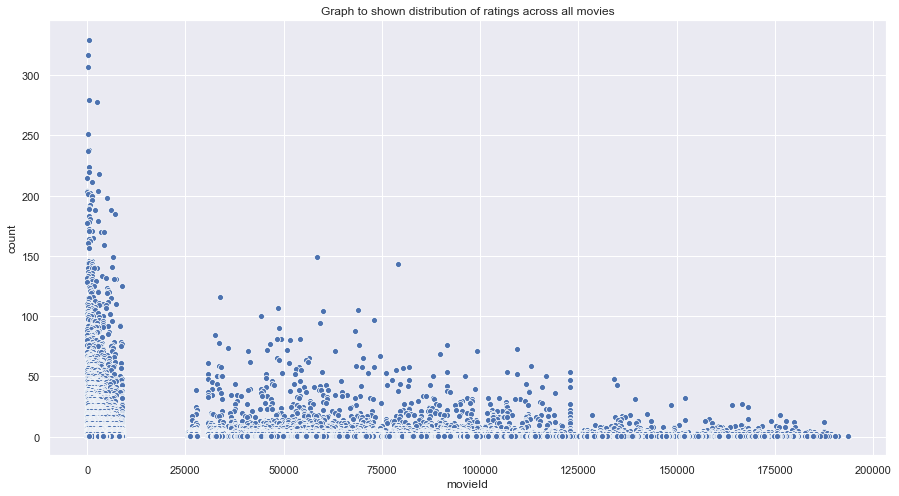

In [79]:
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.scatterplot(x='movieId', y='count', data=df1); 
ax.set_title('Graph to shown distribution of ratings across all movies')

As we can see from the graph above there are relatively few movies that have, say, 50 or more reviews. It's a possibility that we may be able to split the data at this threshold of reviews to see if the models are more or less accurate above and below that number. We can then choose which model to use in each case. 

In [14]:
# sns.palplot(sns.color_palette("BuGn", 10))\
# sns.set(rc={'figure.figsize':(15,8)})
# sns.countplot(x='movieId', data=df1)

In [57]:
# plt.style.use('classic')
# plt.bar(x=df1['movieId'], height=df1['count'],  data=df1, color='red')
# plt.xlabel('movie id')

## Distribution of Ratings

In [30]:
data = df['rating'].value_counts().sort_index(ascending=False)
data.to_frame()

,rating
5.0,13211
4.5,8551
4.0,26818
3.5,13136
3.0,20047
2.5,5550
2.0,7551
1.5,1791
1.0,2811
0.5,1370


In [38]:
trace = go.Bar(x = data.index, text = ['{:.1f} %'.format(val) for val in (data.values /df.shape[0]*100)],
               textposition = 'auto', 
               textfont = dict(color = '#000000'),
               y=data.values)

In [40]:
layout = dict(title = 'Distribution of {} ratings across full data set'.format(df.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

We can see from the above bar chart that higher rated movies (ratings, 3-5) make up for over 81% of the data set ratings. We must decide if this bias in the data set should be considered when looking into our models. 

Let' see what the ratings distribution by movie looks like. 

In [45]:
user_data = df.groupby('movieId')['rating'].count().clip(upper=50)

trace = go.Histogram(x = user_data.values,
                     name = 'Ratings',
                     xbins = dict(start=0, end=50, size=2))
#Create Layout
layout = go.Layout(title = 'Distribution Of number of ratings per movie (50 ratings and under)',
                   xaxis = dict(title = 'Number of ratings per movie'),
                   yaxis = dict(title = 'Movie count'),
                   bargap = 0.2)

#Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [56]:
user_data = df.groupby('movieId')['rating'].count().clip(upper=380)

trace = go.Histogram(x = user_data.values,
                     name = 'Ratings',
                     xbins = dict(start=50, end=380, size=5))
#Create Layout
layout = go.Layout(title = 'Distribution Of number of ratings per movie (above 50 ratings)',
                   xaxis = dict(title = 'Number of ratings per movie'),
                   yaxis = dict(title = 'Movie count'),
                   bargap = 0.2)

#Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

We note in the above two plots that 7455 movies have under 10 ratings! We know form previous work on this project that there are 9742 movies in total. So 76% of the movies have under 10 ratings and, are only responsible for ~ 20000 or ~20% of the ratings in the whole data set. 

Comparitively, 24% of the movies are responsible for the other ~80% of the ratings. There could be some merit in utilising this smaller data set when making certain recommendations. 


Interstingly enough thes ratios fit well with the pareto effect which appears to be a natural law that says
that 80% of the effect comes from 20% of the causes or 80% of the productivity comes from 20% of the resource. In our case 20% of the movies are responsible for around 80% of the ratings. 

In [58]:
df.userId.nunique()

610

In [93]:
df0 = df.head()
df0

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [94]:
for column in df0[['movieId', 'rating']]:
    columnobj = df0[column]
    
    print('column name : ', column)
    print('column Contents : ', columnobj.values)

column name :  movieId
column Contents :  [ 1  3  6 47 50]
column name :  rating
column Contents :  [4. 4. 4. 5. 5.]


In [102]:
bub_df1 = df.movieId.value_counts().to_frame()
bub_df1.reset_index()

,index,movieId
0,356,329
1,318,317
2,296,307
3,593,279
4,2571,278
...,...,...
9719,5986,1
9720,100304,1
9721,34800,1
9722,83976,1


In [117]:
bub_df1.rename(columns={'index':'movieId', 'movieId':'no_ratings'}).reset_index(inplace=True)
bub_df1

,no_ratings
356,329
318,317
296,307
593,279
2571,278
...,...
5986,1
100304,1
34800,1
83976,1


In [118]:
bub_df1.index.names = ['movieId']

In [134]:
bub_df2 = bub_df1.reset_index()
bub_df2.head()

,movieId,no_ratings
0,356,329
1,318,317
2,296,307
3,593,279
4,2571,278


In [128]:
bub_df2['no_ratings'].sum()

100836

In [130]:
bub_df2['movieId'].nunique()

9724

In [140]:
df.movieId.value_counts(normalize=True)

356       0.003263
318       0.003144
296       0.003045
593       0.002767
2571      0.002757
            ...   
5986      0.000010
100304    0.000010
34800     0.000010
83976     0.000010
8196      0.000010
Name: movieId, Length: 9724, dtype: float64

In [136]:
for column in df0[['movieId', 'rating']].head():
    columnobj = df0[column]
    
    print('column name : ', column)
    print('column Contents : ', columnobj.values)

column name :  movieId
column Contents :  [ 1  3  6 47 50]
column name :  rating
column Contents :  [4. 4. 4. 5. 5.]


In [135]:
# for column in bub_df2['movieId']:
#     twenty_percent = 0
#     forty_percent = 0
#     sixty_percent = 0
#     eighty_percent = 0
#     hundred_percent = 0
# #     
#     for value in bub_df2['no_ratings'].values:
#         if twenty_percent < (bub_df2['no_ratings'].sum()/20):
#             twenty_percent += value
#         pass

# print(twenty_percent)       

# #     columnobj = df0[column]
    
# #     print('column name : ', column)
# #     print('column Contents : ', columnobj.values)

In [ ]:
bub_df2['perc'] = bub_df2.iloc['']
    